```
Copyright (C) 2024-2025 Yucheng Liu. Under the GNU AGPL 3.0 License.
GNU AGPL 3.0 License: https://www.gnu.org/licenses/agpl-3.0.txt .

Copyright (C) 2024-2025 Yucheng Liu. Under the CC-BY-SA 4.0 License.
CC-BY-SA 4.0 License: https://creativecommons.org/licenses/by-sa/4.0/legalcode.txt .
```

# 2.1. Analyzing All Users' Angular Velocity Data

Analyzing all users' VR sickness vs. VR locomotion angular velocity data.

Note the following items.

- We need to run `./_0_1_Data_Shared_Prepare.ipynb` before running the below code blocks.
- Then, we need to run `./_2_0_Data_AngularVelocity_AllUsers_Prepare.ipynb` before running the below code blocks.

Read the following comprehensive (with-sickness and without-sickness) data files from the `./_2_Data_AngularVelocity_AllUsers` folder.

- Read `AllUsers_Time.json` and convert its contents to a `Items_Time` list `[]`.
- Read `AllUsers_AngularVelocity.json` and convert its contents to a `Items_AngularVelocity` list `[]`.
- Read `AllUsers_Sickness.json` and convert its contents to a `Items_Sickness` list `[]`.
  - Create a copy of `Items_Sickness` called `Items_Sickness_Categories` and convert all its values to `str` categories.

Read the following with-sickness data files from the `./_2_Data_AngularVelocity_AllUsers` folder.

- Read `AllUsers_WithSickness_Time.json` and convert its contents to a `Items_WithSickness_Time` list `[]`.
- Read `AllUsers_WithSickness_AngularVelocity.json` and convert its contents to a `Items_WithSickness_AngularVelocity` list `[]`.
- Read `AllUsers_WithSickness_Sickness.json` and convert its contents to a `Items_WithSickness_Sickness` list `[]`.
  - Create a copy of `Items_WithSickness_Sickness` called `Items_WithSickness_Sickness_Categories` and convert all its values to `str` categories.


In [1]:
import os
import json
import pandas

Path_Self = os.path.abspath(os.path.curdir)
Path_Input = os.path.join(Path_Self, "_2_Data_AngularVelocity_AllUsers")
Path_Input_Time = os.path.join(Path_Input, "AllUsers_Time.json")
Path_Input_AngularVelocity = os.path.join(Path_Input, "AllUsers_AngularVelocity.json")
Path_Input_Sickness = os.path.join(Path_Input, "AllUsers_Sickness.json")
Path_Input_WithSickness_Time = os.path.join(Path_Input, "AllUsers_WithSickness_Time.json")
Path_Input_WithSickness_AngularVelocity = os.path.join(Path_Input, "AllUsers_WithSickness_AngularVelocity.json")
Path_Input_WithSickness_Sickness = os.path.join(Path_Input, "AllUsers_WithSickness_Sickness.json")
Path_Output = os.path.join(Path_Self, "Figures_Computed")
Path_Output_Users = os.path.join(Path_Output, f"AllUsers")
os.makedirs(Path_Output_Users, exist_ok=True)

def Path_Output_Figure_Find(Path_):
    return os.path.join(Path_Output_Users, Path_)
# end def

Items_Time = []
Items_EyeGazeAngularVelocity = []
Items_Sickness = []
Items_WithSickness_Time = []
Items_WithSickness_EyeGazeAngularVelocity = []
Items_WithSickness_Sickness = []

Paths_AndItems = [
    (Path_Input_Time, Items_Time),
    (Path_Input_AngularVelocity, Items_EyeGazeAngularVelocity),
    (Path_Input_Sickness, Items_Sickness),
    (Path_Input_WithSickness_Time, Items_WithSickness_Time),
    (Path_Input_WithSickness_AngularVelocity, Items_WithSickness_EyeGazeAngularVelocity),
    (Path_Input_WithSickness_Sickness, Items_WithSickness_Sickness),
]

for Index, (Path_, Items) in enumerate(Paths_AndItems):
    with open(Path_, "r") as File_:
        print(f"Begin reading file {Index + 1} / {len(Paths_AndItems)}")
        Items[:] = json.load(File_)
        Items[:] = list(Items)
        print(f"End reading file {Index + 1} / {len(Paths_AndItems)}")
    # end with
# end for

Items_Sickness_Categories = []
Items_WithSickness_Sickness_Categories = []

for Index, Item in enumerate(Items_Sickness):
    Sickness_Category = str(int(Item))
    Items_Sickness_Categories.append(Sickness_Category)
# end

for Index, Item in enumerate(Items_WithSickness_Sickness):
    Sickness_Category = str(int(Item))
    Items_WithSickness_Sickness_Categories.append(Sickness_Category)
# end

Data_ = pandas.DataFrame({
    "Time": Items_Time,
    "AngularVelocity": Items_EyeGazeAngularVelocity,
    "Sickness": Items_Sickness,
    "SicknessCategory": Items_Sickness_Categories,
})

print(
    "Begin Data_\n"
    + str(Data_.describe())
    + "\nEnd Data_"
)

Data_WithSickness = pandas.DataFrame({
    "Time": Items_WithSickness_Time,
    "AngularVelocity": Items_WithSickness_EyeGazeAngularVelocity,
    "Sickness": Items_WithSickness_Sickness,
    "SicknessCategory": Items_WithSickness_Sickness_Categories,
})

print(
    "Begin Data_WithSickness\n"
    + str(Data_WithSickness.describe())
    + "\nEnd Data_WithSickness"
)


Begin reading file 1 / 6
End reading file 1 / 6
Begin reading file 2 / 6
End reading file 2 / 6
Begin reading file 3 / 6
End reading file 3 / 6
Begin reading file 4 / 6
End reading file 4 / 6
Begin reading file 5 / 6
End reading file 5 / 6
Begin reading file 6 / 6
End reading file 6 / 6
Begin Data_
               Time  AngularVelocity     Sickness
count  24221.000000     2.422100e+04  24221.00000
mean     520.280328     1.962517e+01      0.13191
std      297.902077     1.666375e+01      0.33840
min        0.000000     1.884189e-09      0.00000
25%      264.144470     5.051496e+00      0.00000
50%      520.988914     1.366549e+01      0.00000
75%      778.422266     3.312773e+01      0.00000
max     1032.511156     1.228169e+02      1.00000
End Data_
Begin Data_WithSickness
              Time  AngularVelocity     Sickness
count  6521.000000      6521.000000  6521.000000
mean    139.706203        31.154058     0.489956
std      80.318057        15.106576     0.499937
min       0.000000  

Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of `Items_AngularVelocity`.

In [2]:
import pandas

print("All Users' Locomotion Angular Velocity Descriptive Statistics")

Data_["AngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All Users' Locomotion Angular Velocity Descriptive Statistics


count    24221.000000
mean        19.625168
std         16.663748
min          0.000000
25%          5.051496
50%         13.665492
75%         33.127728
max        122.816933
Name: AngularVelocity, dtype: object

Note that we have to run all the above code blocks before running the below one.

Compute a graphical category plot of the `Items_AngularVelocity` data.

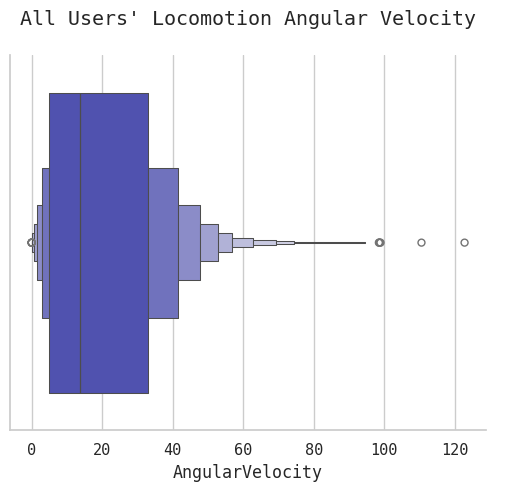

In [3]:
import seaborn
import matplotlib.pyplot as pyplot

ColorMap = seaborn.hls_palette(
    n_colors=6,
    h=0.83,
    l=0.50,
    s=0.50,
)

Palette_ = seaborn.color_palette(ColorMap)
Palette_.reverse()

seaborn.set_theme(
    context="notebook",
    style="whitegrid",
    palette=Palette_,
    font="monospace",
)

Plot = seaborn.catplot(
    data=Data_,
    x="AngularVelocity",
    kind="boxen",
    native_scale=True,
)

Plot.figure.suptitle("All Users' Locomotion Angular Velocity")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMoveAngVel_Stats.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of the `Items_AngularVelocity` vs. `Items_Sickness_Categories[*] == "0"` data.

In [4]:
import pandas

Data_Sickness0 = Data_[Data_["SicknessCategory"] == "0"]

print("All Users' Locomotion Angular Velocity (When Sickness == 0) Descriptive Statistics")

Data_Sickness0["AngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All Users' Locomotion Angular Velocity (When Sickness == 0) Descriptive Statistics


count    21026.000000
mean        17.659293
std         16.141935
min          0.000000
25%          4.496073
50%         10.312441
75%         30.353309
max        110.590416
Name: AngularVelocity, dtype: object

Note that we have to run all the above code blocks before running the below one.

Compute textual descriptive statistics of the `Items_AngularVelocity` vs. `Items_Sickness_Categories[*] == "1"` data.

In [5]:
import pandas

Data_Sickness1 = Data_[Data_["SicknessCategory"] == "1"]

print("All Users' Locomotion Angular Velocity (When Sickness == 1) Descriptive Statistics")

Data_Sickness1["AngularVelocity"].describe().apply(
    lambda Value:
        format(Value, ".6f")
    # end lambda
)

All Users' Locomotion Angular Velocity (When Sickness == 1) Descriptive Statistics


count    3195.000000
mean       32.562415
std        14.056545
min         0.584510
25%        23.695650
50%        32.228500
75%        41.244228
max       122.816933
Name: AngularVelocity, dtype: object

Note that we have to run all the above code blocks before running the below one.

Compute textual summary of compare means statistical tests on `Items_AngularVelocity` items with `Items_Sickness_Categories[*] == "0"` vs `Items_Sickness_Categories[*] == "1"`.

In [6]:
import statsmodels.stats.weightstats as StatsModels_WeightStats

CompareMeans = StatsModels_WeightStats.CompareMeans(
    StatsModels_WeightStats.DescrStatsW(Data_Sickness0["AngularVelocity"]),
    StatsModels_WeightStats.DescrStatsW(Data_Sickness1["AngularVelocity"]),
)

print(
    f"All Users' Locomotion Angular Velocity\n"
    + "[When Sickness == 0 vs. When Sickness == 1]\n"
    + "Compare Means Statistical Tests"
)

print(
    CompareMeans.summary(
        use_t=True,
        alpha=0.05,
        usevar="unequal",
        value=0.0
    )
)


All Users' Locomotion Angular Velocity
[When Sickness == 0 vs. When Sickness == 1]
Compare Means Statistical Tests
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    -14.9031      0.272    -54.698      0.000     -15.437     -14.369


Note that we have to run all the above code blocks before running the below one.

Compute a graphical category plot of the `Items_AngularVelocity` vs. `Items_Sickness_Categories` data.

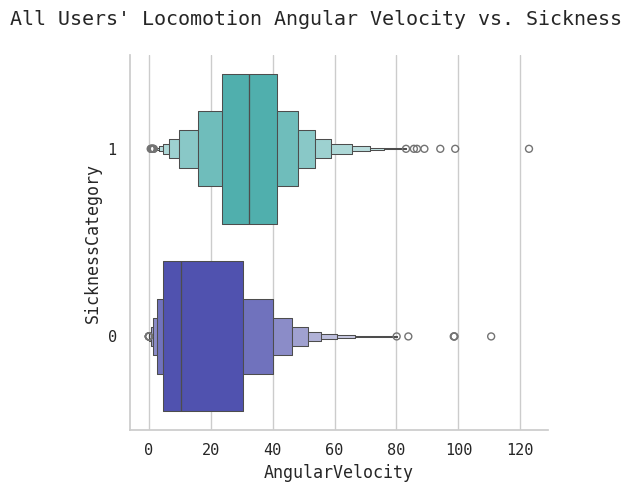

In [7]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.catplot(
    data=Data_,
    x="AngularVelocity",
    y="SicknessCategory",
    hue="SicknessCategory",
    kind="boxen",
    order=["1", "0"],
    native_scale=True,
)

Plot.figure.suptitle("All Users' Locomotion Angular Velocity vs. Sickness")
pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMoveAngVel_VSSick_Stats.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual linear regression statistics of the `Items_AngularVelocity` vs. `Items_Sickness` data.

In [8]:
import numpy
import sklearn.preprocessing as SKLearn_Preprocess
import statsmodels.api as StatsModels_API

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=1)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Regression_Model = StatsModels_API.GLS(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()

print(
    "All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Linear Regression"
)

print(Regression_Results.summary())


All Users' [Locomotion Angular Velocity - Sickness]
Linear Regression
                            GLS Regression Results                            
Dep. Variable:               Sickness   R-squared:                       0.092
Model:                            GLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2442.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:36   Log-Likelihood:                -6960.1
No. Observations:               24221   AIC:                         1.392e+04
Df Residuals:                   24219   BIC:                         1.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Note that we have to run all the above code blocks before running the below one.

Compute a graphical linear regression plot of the `Items_AngularVelocity` vs. `Items_Sickness` data.

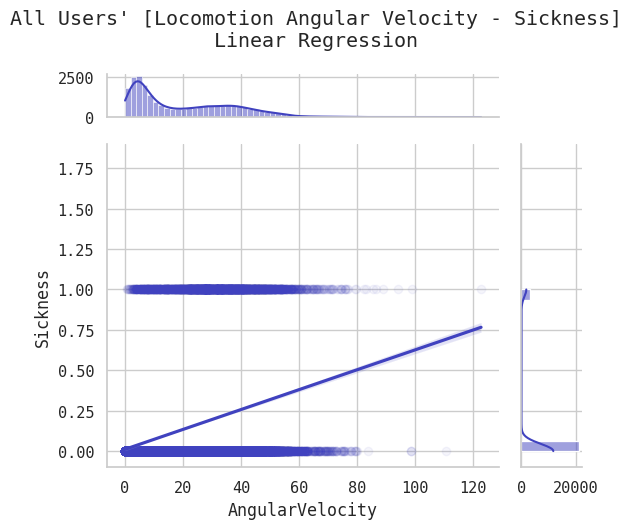

In [9]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    
    joint_kws={
        "order": 1,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    "All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Linear Regression"
)

pyplot.tight_layout(rect=[0, 0.1, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMoveAngVel_Sick_LineReg.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual [polynomial regression order 4] statistics of the `Items_AngularVelocity` vs. `Items_Sickness` data.

In [10]:
import numpy
import sklearn.preprocessing as SKLearn_Preprocess
import statsmodels.api as StatsModels_API

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=4)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Data_AngularVelocity = StatsModels_API.add_constant(Data_AngularVelocity, prepend=False)
Regression_Model = StatsModels_API.OLS(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()
print("All Users' [Locomotion Angular Velocity - Sickness] [Ploynominal Regression Order 4]")
print(Regression_Results.summary())


All Users' [Locomotion Angular Velocity - Sickness] [Ploynominal Regression Order 4]
                            OLS Regression Results                            
Dep. Variable:               Sickness   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     693.7
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:37   Log-Likelihood:                -6809.8
No. Observations:               24221   AIC:                         1.363e+04
Df Residuals:                   24216   BIC:                         1.367e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

Note that we have to run all the above code blocks before running the below one.

Compute a graphical [polynomial regression order 4] plot of the `Items_AngularVelocity` vs. `Items_Sickness` data.

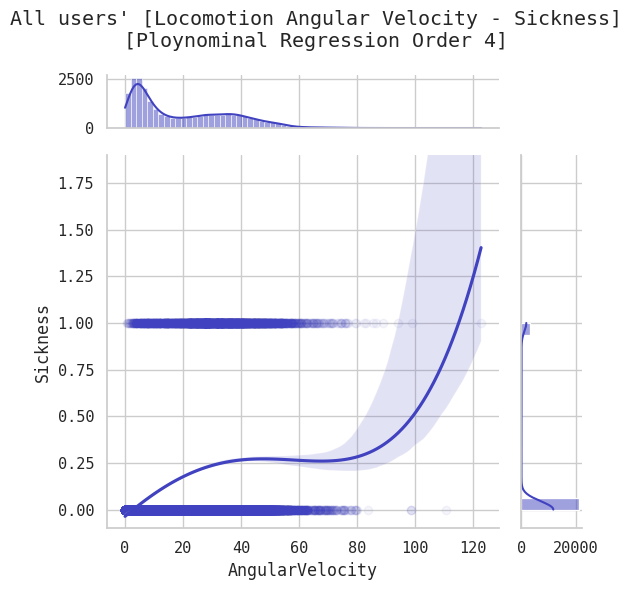

In [11]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    
    joint_kws={
        "order": 4,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    "All users' [Locomotion Angular Velocity - Sickness]\n"
    + "[Ploynominal Regression Order 4]"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMoveAngVel_Sick_PolyReg.png"),
    dpi=Plot.figure.dpi,
)


Note that we have to run all the above code blocks before running the below one.

Compute textual logistic regression statistics of the `Items_AngularVelocity` vs. `Items_Sickness` data.

In [12]:
import numpy
import sklearn.preprocessing as SKLearn_Preprocess
import statsmodels.api as StatsModels_API

Data_Sickness = Data_["Sickness"]
Data_AngularVelocity = Data_["AngularVelocity"]
Polynominal = SKLearn_Preprocess.PolynomialFeatures(degree=1)

Data_AngularVelocity = Polynominal.fit_transform(
    Data_AngularVelocity.to_numpy().reshape(-1, 1)
)

Data_AngularVelocity = StatsModels_API.add_constant(Data_AngularVelocity, prepend=False)
Regression_Model = StatsModels_API.Logit(Data_Sickness, Data_AngularVelocity)
Regression_Results = Regression_Model.fit()
print("All Users' [Locomotion Angular Velocity - Sickness] Logistic Regression")
print(Regression_Results.summary())


Optimization terminated successfully.
         Current function value: 0.347439
         Iterations 7
All Users' [Locomotion Angular Velocity - Sickness] Logistic Regression
                           Logit Regression Results                           
Dep. Variable:               Sickness   No. Observations:                24221
Model:                          Logit   Df Residuals:                    24219
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1091
Time:                        11:39:41   Log-Likelihood:                -8415.3
converged:                       True   LL-Null:                       -9446.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1264      0.040    

Note that we have to run all the above code blocks before running the below one.

Compute a graphical logistic regression plot of the `Items_AngularVelocity` vs. `Items_Sickness` data.

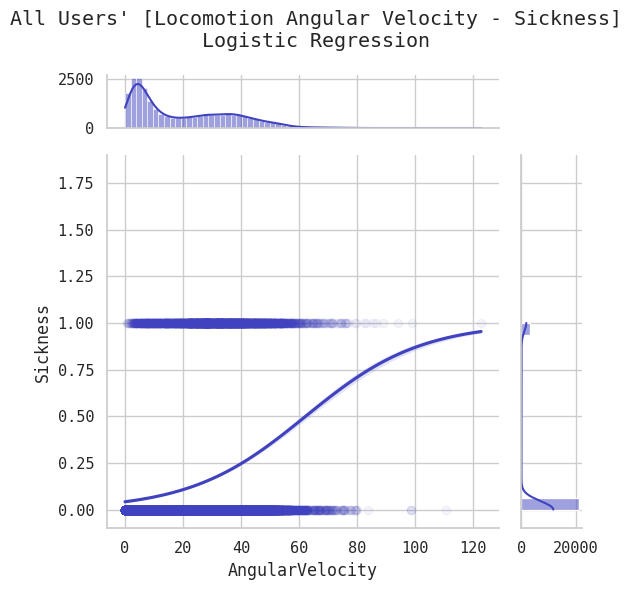

In [13]:
import seaborn
import matplotlib.pyplot as pyplot

Plot = seaborn.jointplot(
    data=Data_,
    x="AngularVelocity",
    y="Sickness",
    kind="reg",
    ylim=[-0.1, 1.9],
    marginal_ticks=True,
    
    joint_kws={
        "logistic": True,
        
        "scatter_kws": {
            "alpha": 0.05
        },
    },
)

Plot.figure.suptitle(
    "All Users' [Locomotion Angular Velocity - Sickness]\n"
    + "Logistic Regression"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_LocMoveAngVel_Sick_LogReg.png"),
    dpi=Plot.figure.dpi,
)


## Congrats! 

We have completed this `ipynb` notebook.